# E.D.A

## Imorting the Extracted Data Table from the NASA Exoplanet WebPage

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('exoplanet_data.csv')

# Display the first few rows
df

,Name,Distance,Mass,Discovery Date,Stellar Magnitude
0,11 Comae Berenices b,304.0,19.4 Jupiters,2007,4.72307
1,11 Ursae Minoris b,409.0,14.74 Jupiters,2009,5.01300
2,14 Andromedae b,246.0,4.8 Jupiters,2008,5.23133
3,14 Herculis b,58.0,8.053 Jupiters,2002,6.61935
4,16 Cygni B b,69.0,1.78 Jupiters,1996,6.21500
...,...,...,...,...,...
5458,XO-7 b,764.0,0.709 Jupiters,2019,10.52100
5459,YSES 2 b,357.0,6.3 Jupiters,2021,10.88500
5460,YZ Ceti b,12.0,0.7 Earths,2017,12.07400
5461,YZ Ceti c,12.0,1.14 Earths,2017,12.07400


### The unit of mass are of 2 types Earth masses and Jupiter masses,so here using the below code i have converted the unit of masses to a single unit that is Earth masses 

In [2]:
# Conversion factor from Jupiter to Earth
jupiter_to_earth = 317.8

# Initialize a new DataFrame to store the converted masses
df_converted = df.copy()

# Convert the masses
for i in range(len(df)):
    # Check if the mass can be split into a number and a unit
    if ' ' in df['Mass'][i]:
        # Get the mass and unit
        mass, unit = df['Mass'][i].split(' ')
        mass = float(mass)

        # Convert to Earth masses if necessary
        if unit == 'Jupiters':
            mass *= jupiter_to_earth

        # Store the converted mass
        df_converted.loc[i, 'Mass'] = mass
    else:
        # If the mass can't be split, set it to NaN
        df_converted.loc[i, 'Mass'] = float('nan')
df_converted

,Name,Distance,Mass,Discovery Date,Stellar Magnitude
0,11 Comae Berenices b,304.0,6165.32,2007,4.72307
1,11 Ursae Minoris b,409.0,4684.372,2009,5.01300
2,14 Andromedae b,246.0,1525.44,2008,5.23133
3,14 Herculis b,58.0,2559.2434,2002,6.61935
4,16 Cygni B b,69.0,565.684,1996,6.21500
...,...,...,...,...,...
5458,XO-7 b,764.0,225.3202,2019,10.52100
5459,YSES 2 b,357.0,2002.14,2021,10.88500
5460,YZ Ceti b,12.0,0.7,2017,12.07400
5461,YZ Ceti c,12.0,1.14,2017,12.07400


###  Checking for missing values

In [3]:
df_converted.isnull().sum()

Name                   0
Distance              21
Mass                  24
Discovery Date         0
Stellar Magnitude    208
dtype: int64

###  Summary statistics

In [4]:
df_converted.describe()

,Distance,Discovery Date,Stellar Magnitude
count,5442.000000,5463.000000,5255.000000
mean,2285.113745,2016.014095,12.686250
std,3557.786253,4.446556,3.090664
min,4.000000,1992.000000,0.872000
25%,396.000000,2014.000000,10.963000
50%,1375.500000,2016.000000,13.520000
75%,2807.000000,2019.000000,15.029000
max,27727.000000,2023.000000,44.610000


### Visualizing the relationships between variables.

/Users/agastya/Documents/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


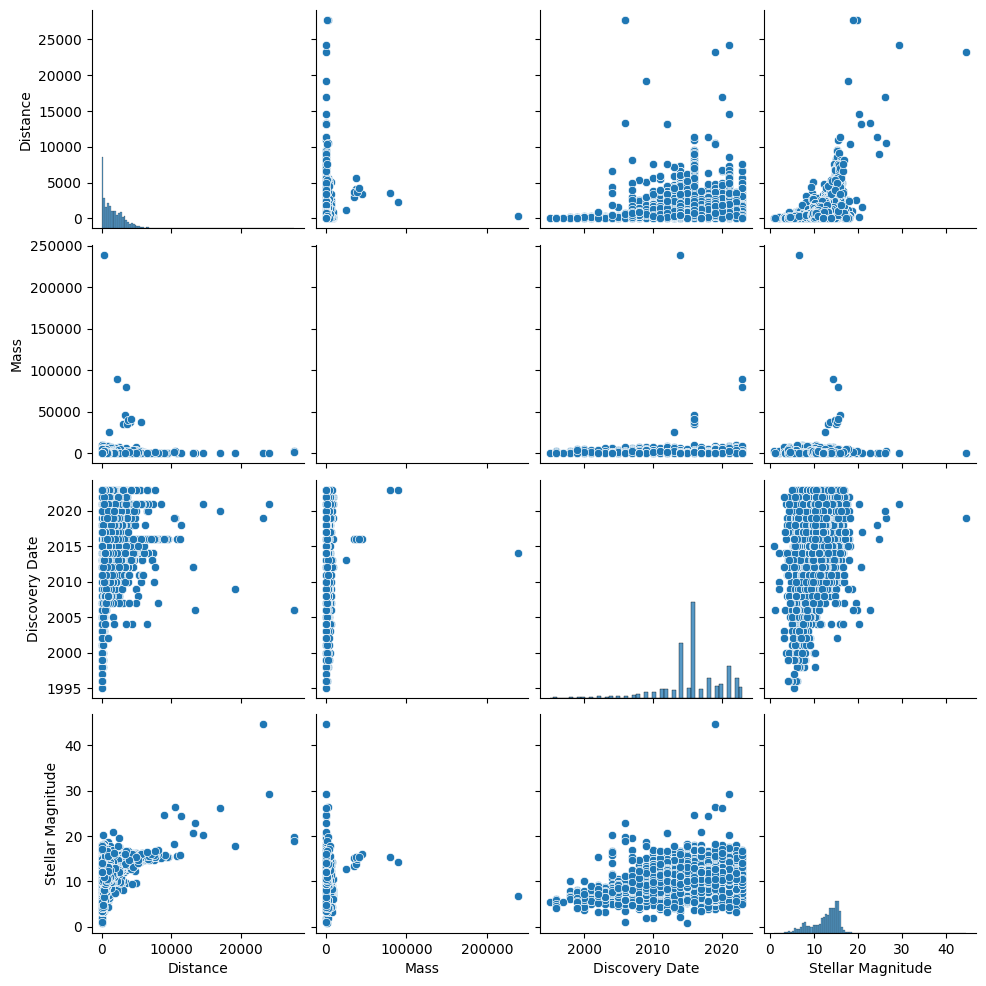

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for visualizing the relationships between variables
sns.pairplot(df_converted.dropna())
plt.show()

### Count plots showing number of planets discovered in each year

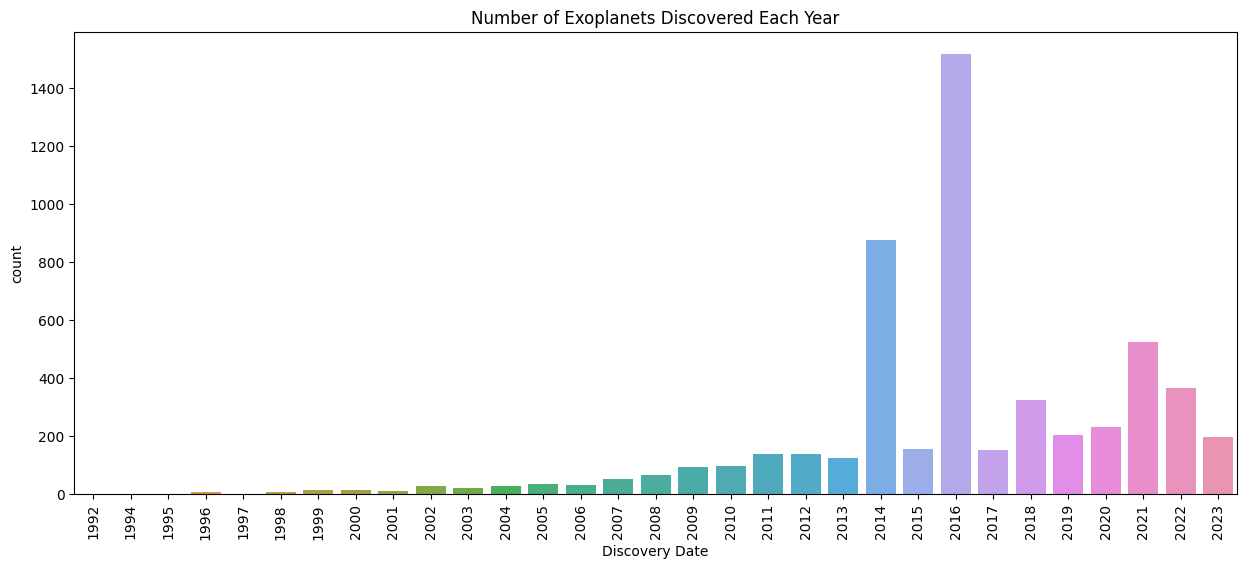

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_converted, x='Discovery Date')
plt.xticks(rotation=90)
plt.title("Number of Exoplanets Discovered Each Year")
plt.show()

### Distribution of Stellar Magnitude

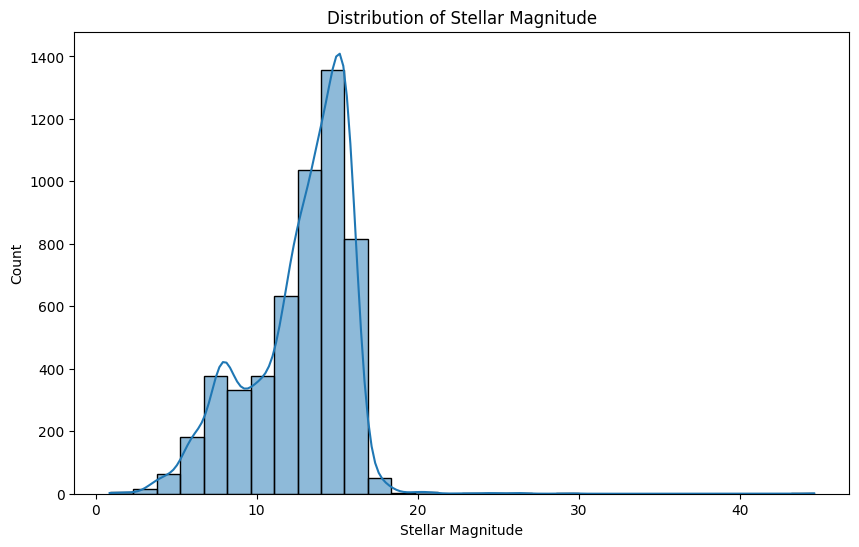

In [7]:
# Plotting a histogram for Stellar Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(data=df_converted, x='Stellar Magnitude', bins=30, kde=True)
plt.title('Distribution of Stellar Magnitude')
plt.show()

####  we can see, the distribution of stellar magnitude has a peak around 13-14 and then decreases. This indicates that most of the exoplanets have a stellar magnitude in this range. The distribution has a long tail towards the right, indicating the presence of exoplanets with exceptionally high stellar magnitudes.

### Box Plot of the Features/Variables

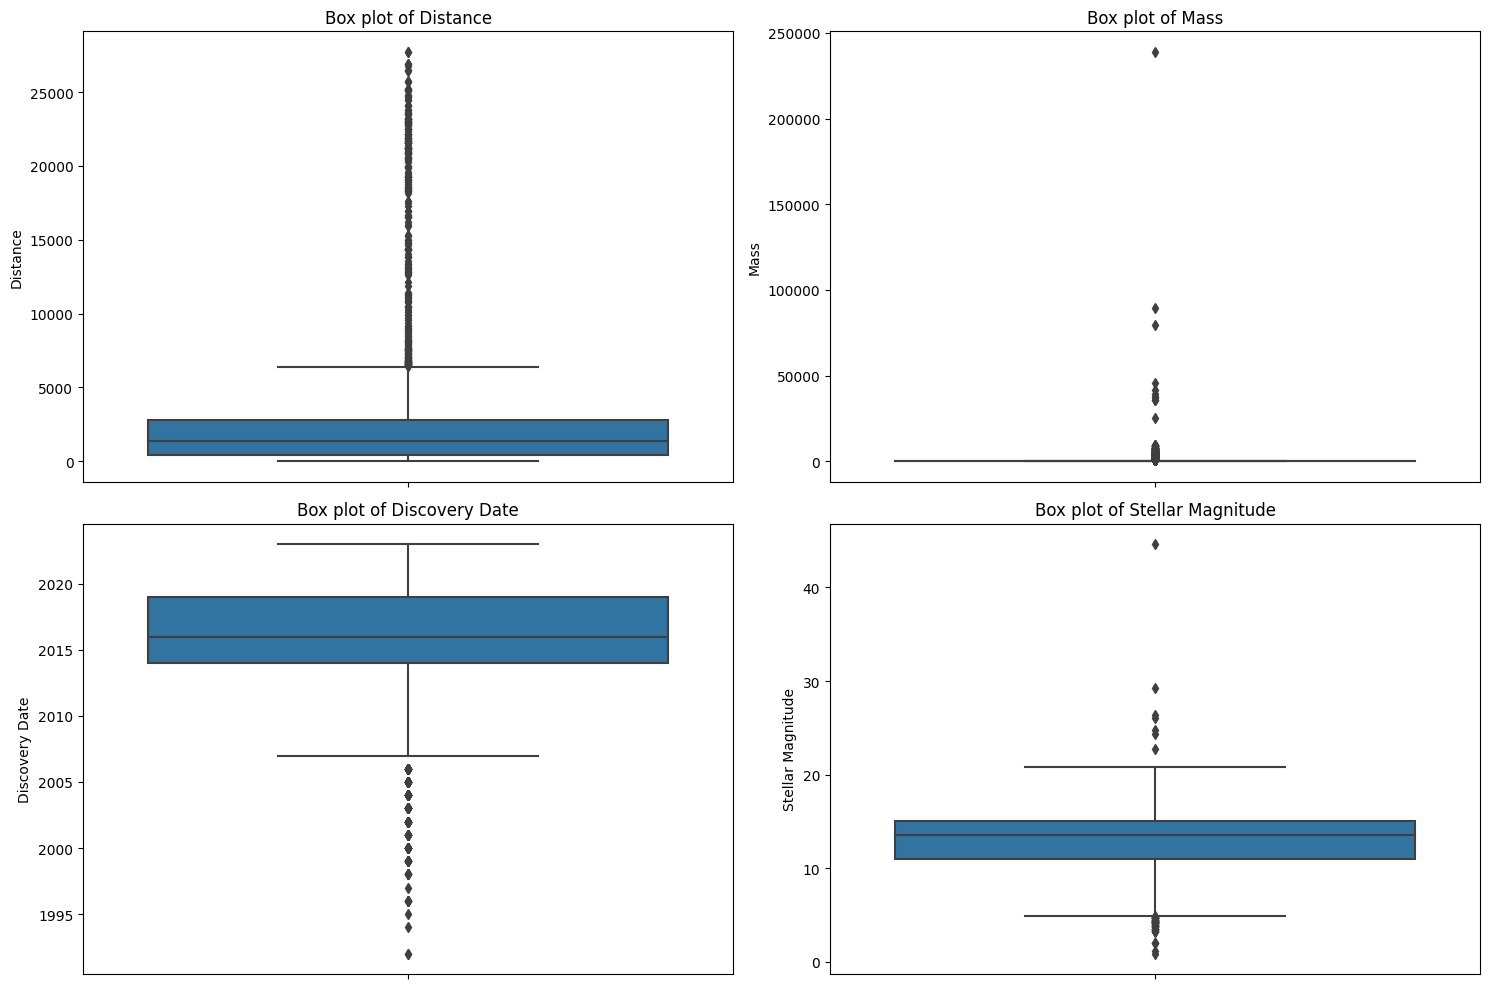

In [8]:
# Box plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df_converted, y='Distance')
plt.title('Box plot of Distance')

plt.subplot(2, 2, 2)
sns.boxplot(data=df_converted, y='Mass')
plt.title('Box plot of Mass')

plt.subplot(2, 2, 3)
sns.boxplot(data=df_converted, y='Discovery Date')
plt.title('Box plot of Discovery Date')

plt.subplot(2, 2, 4)
sns.boxplot(data=df_converted, y='Stellar Magnitude')
plt.title('Box plot of Stellar Magnitude')

plt.tight_layout()
plt.show()

#### The box plots provide a visual representation of the distribution of our numerical variables:

##### The "Distance" box plot shows a wide range of values, with several outliers that are significantly further than most of the data. The median distance is lower than the mean, indicating a right-skewed distribution.
##### The "Mass" box plot also shows a right-skewed distribution, with a large number of outliers.
##### The "Discovery Date" box plot shows that the majority of the discoveries have been made in recent years, with a fairly even distribution across those years.
##### The "Stellar Magnitude" box plot shows a wide range of values, with several outliers. The distribution appears to be fairly symmetrical, but with a long tail towards higher magnitudes.

### Correlation Anaylsis

In [9]:
# Select the relevant columns
selected_data = df_converted[['Distance', 'Mass', 'Stellar Magnitude']]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)

                   Distance      Mass  Stellar Magnitude
Distance           1.000000 -0.010007           0.613902
Mass              -0.010007  1.000000          -0.098131
Stellar Magnitude  0.613902 -0.098131           1.000000


### Heatmap of correlation matrix

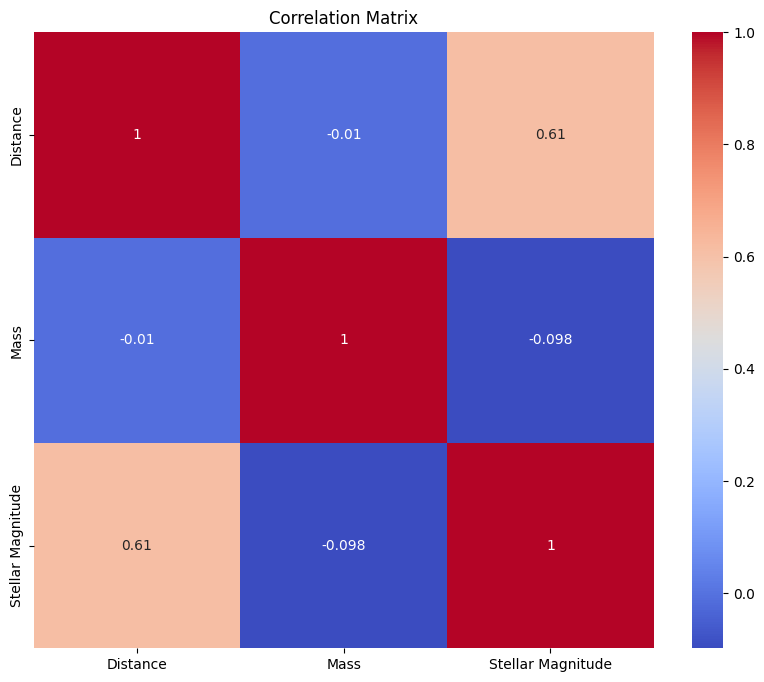

In [10]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### The heatmap provides a visual representation of the correlation matrix. Darker colors indicate stronger positive correlations, while lighter colors indicate weaker correlations. From this, we can see that the strongest correlation is between "Distance" and "Stellar Magnitude". 

### Stellar Magnitude vs Distance

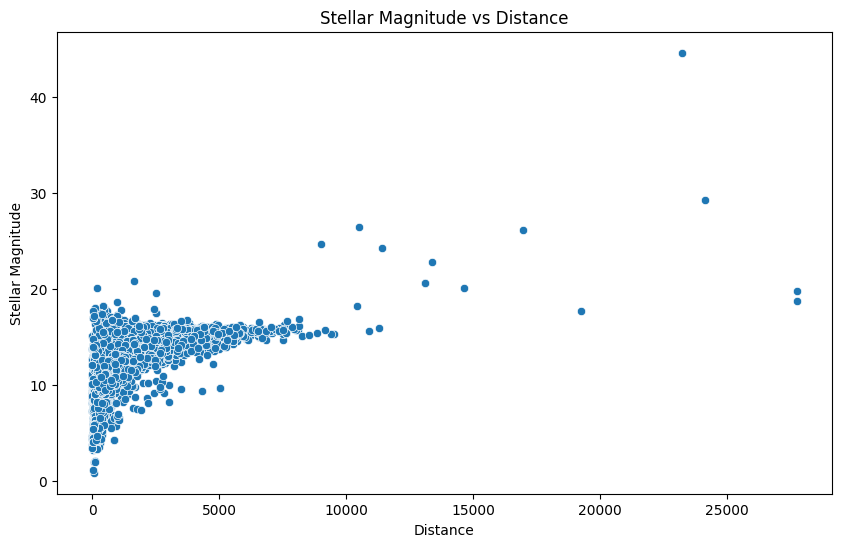

In [11]:
# Removing missing values
df_clean = df_converted.dropna()

# Scatter plot of Stellar Magnitude vs Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Distance', y='Stellar Magnitude')
plt.title('Stellar Magnitude vs Distance')
plt.show()

#### The scatter plot above displays the relationship between "Stellar Magnitude" and "Distance". As we can see, there is a positive correlation between these two variables, which indicates that as the distance increases, the stellar magnitude also tends to increase. This is consistent with our earlier correlation analysis.

### Stellar Magnitude vs Mass

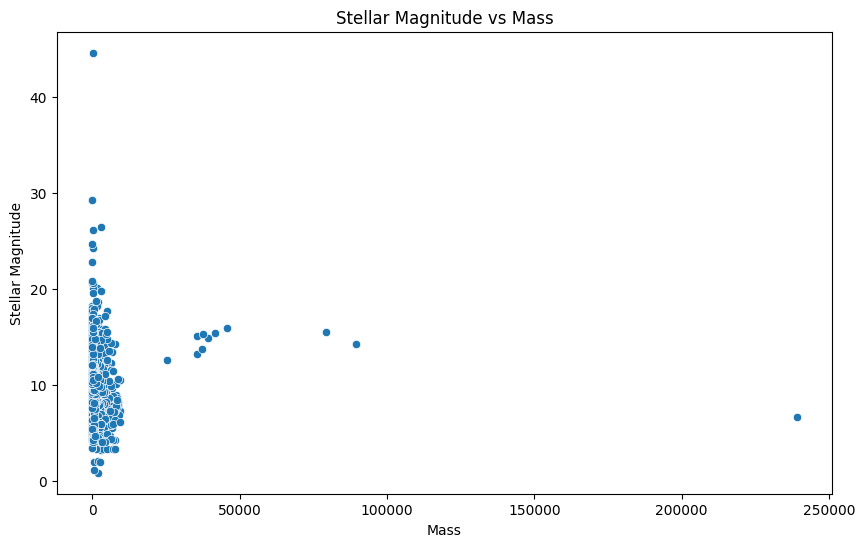

In [12]:
# Scatter plot of Mass vs Stellar Magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Mass', y='Stellar Magnitude')
plt.title('Stellar Magnitude vs Mass')
plt.show()

### Removing the Outliers

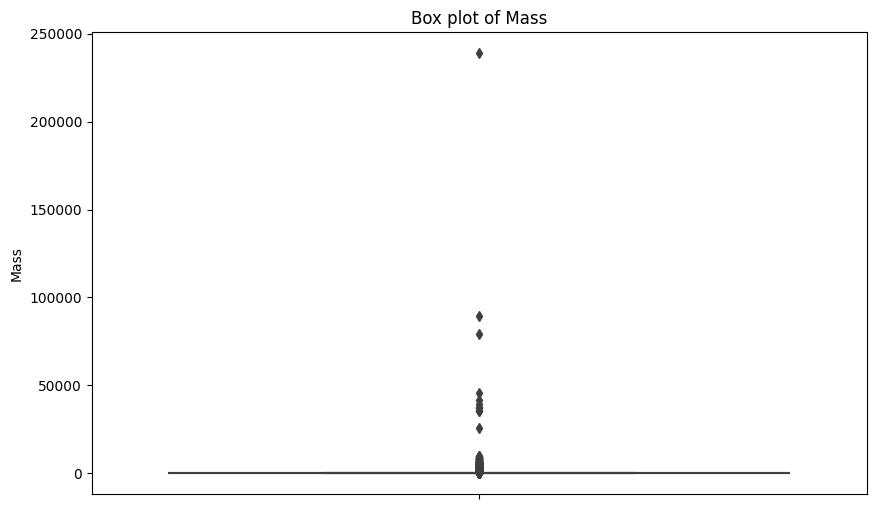

In [13]:
# Box plot for Mass
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, y='Mass')
plt.title('Box plot of Mass')
plt.show()


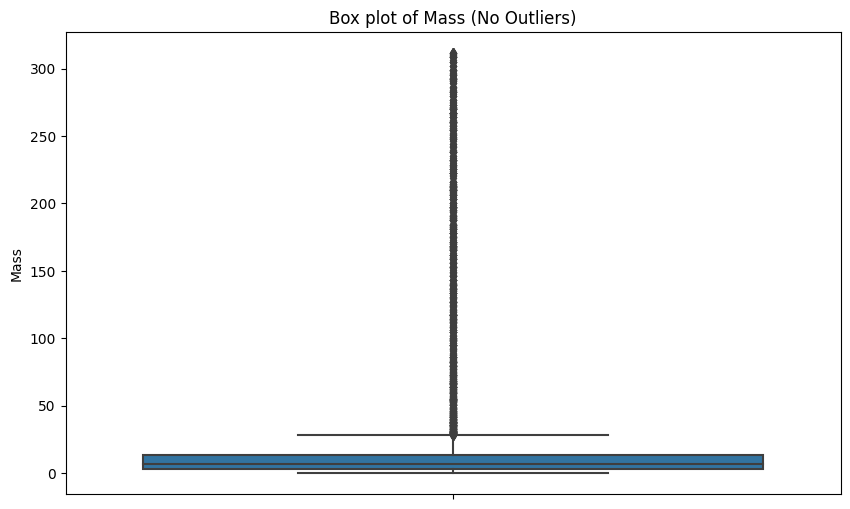

In [14]:
# Calculate IQR
Q1 = df_clean['Mass'].quantile(0.25)
Q3 = df_clean['Mass'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df_clean[(df_clean['Mass'] >= lower_bound) & (df_clean['Mass'] <= upper_bound)]

# Box plot for Mass without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, y='Mass')
plt.title('Box plot of Mass (No Outliers)')
plt.show()


### Stellar Magnitude vs Mass (No Outliers)

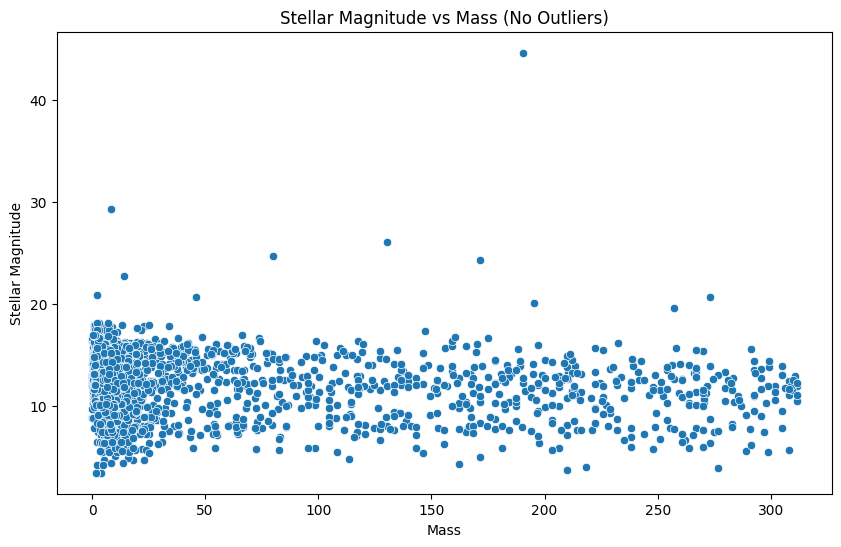

In [15]:
# Scatter plot of Mass vs Stellar Magnitude without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='Mass', y='Stellar Magnitude')
plt.title('Stellar Magnitude vs Mass (No Outliers)')
plt.show()

#### The scatter plot above displays the relationship between "Stellar Magnitude" and "Mass" after removing the outliers. As we can see, there still doesn't seem to be a strong correlation between these two variables.

#### Most of the exoplanets have a mass less than approximately 2500 Earth masses. For these exoplanets, there is a wide range of stellar magnitudes, indicating that mass is not a strong predictor of stellar magnitude.

#### In general, even after removing the outliers, the scatter plot indicates that the mass of an exoplanet doesn't have a strong influence on its stellar magnitude.